# Plot (Local)

## I. Set up

In [209]:
import pathlib
print(pathlib.Path().parent.resolve())

import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 8]

from numpy import mean, array, stack, std
import numpy as np

from collections import Counter

from math import sqrt

import S_Matrix_env
import Plotter

/Users/daniel/Documents/Projects/Present Projects/Machine_Learning_Bootstrap/S_Matrix_Bootstrap/Analysis


In [60]:
def moving_avg(data, mask = 10000):
    
    return [mean(data[:i][-mask:]) for i in range(1, len(data))]

def moving_std(data, mask = 10000):
    
    return [std(data[:i][-mask:]) for i in range(1, len(data))]

### Set up String Spec

In [6]:
mass_spec = [
        sqrt(1), sqrt(2), sqrt(3), sqrt(4), sqrt(5),
        sqrt(2), sqrt(3), sqrt(4), sqrt(5),
        sqrt(3), sqrt(4), sqrt(5),
        sqrt(4), sqrt(5),
        sqrt(5),
     ]

spin_num = {0: 5, 2: 4, 4: 3, 6: 2, 8: 1}

constrained_k = [5 + i for i in range(0, 6)]

In [7]:
mass_spec_no_scalar = [
        sqrt(2), sqrt(3), sqrt(4), sqrt(5),
        sqrt(3), sqrt(4), sqrt(5),
        sqrt(4), sqrt(5),
        sqrt(5),
     ]

spin_num_no_scalar = {2: 4, 4: 3, 6: 2, 8: 1}

In [8]:
string_spec = {
    0: [{'m': sqrt(1), 'cl': 1}, {'m': sqrt(2), 'cl': 1/12}, {'m': sqrt(3), 'cl': 7/360}, {'m': sqrt(4), 'cl': 107/15120}, {'m': sqrt(5), 'cl': 5951/1814400}],
    2: [{'m': sqrt(2), 'cl': 1/6}, {'m': sqrt(3), 'cl': 5/84},  {'m': sqrt(4), 'cl': 13/504}, {'m': sqrt(5), 'cl': 745/57024}],
    4: [{'m': sqrt(3), 'cl': 9/280}, {'m': sqrt(4), 'cl': 76/3465}, {'m': sqrt(5), 'cl': 565/41184}],
    6: [{'m': sqrt(4), 'cl': 16/2079}, {'m': sqrt(5), 'cl': 3125/399168}],
    8: [{'m': sqrt(5), 'cl': 3125/1482624}]
        }

String = S_Matrix_env.S_Matrix(string_spec, string_spec, interested_constraints= constrained_k)
string_norm = - String.Reward()

In [9]:
String.data_frame_form()

,m^2 = 1,m^2 = 2,m^2 = 3,m^2 = 4,m^2 = 5
0,1.0,0.083333,0.019444,0.007077,0.003280
2,NaN,0.166667,0.059524,0.025794,0.013065
4,NaN,NaN,0.032143,0.021934,0.013719
6,NaN,NaN,NaN,0.007696,0.007829
8,NaN,NaN,NaN,NaN,0.002108


## Negative Punishment vs No Negetive Punishment

In [31]:
neg_cnt_neg_cnt = pd.read_excel('neg_cnt_with_neg_punish.xlsx')
neg_vals_neg_cnt = neg_cnt_neg_cnt.values.T[0]
neg_cnt_no_neg_cnt = pd.read_excel('neg_cnt_no_neg_punish.xlsx')
neg_vals_no_neg_cnt = neg_cnt_no_neg_cnt.values.T[0]

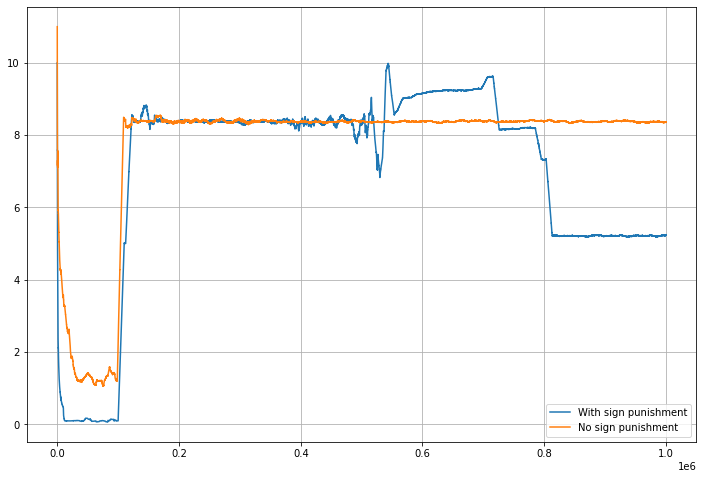

In [78]:
plt.plot([mean(neg_vals_neg_cnt[:i][-10000:]) for i in range(1, 1000000)])
plt.plot([mean(neg_vals_no_neg_cnt[:i][-10000:]) for i in range(1, 1000000)])
plt.grid(True)
plt.legend(["With sign punishment", "No sign punishment"], loc ="lower right")
plt.show()

In [96]:
neg_cnt_dict = {i: list(neg_vals_neg_cnt).count(i) for i in range(max(neg_vals_neg_cnt))}
no_neg_cnt_dict = {i: list(neg_vals_no_neg_cnt).count(i) for i in range(max(neg_vals_no_neg_cnt))}
pd.DataFrame([neg_cnt_dict, no_neg_cnt_dict], index = ['With negative punishment', 'No negative punishment']).transpose()

,With negative punishment,No negative punishment
0,89113,27200
1,10597,36887
2,9309,22334
3,17361,21801
4,44427,37920
5,144482,85226
6,74920,59859
7,27123,20720
8,198184,190737
9,145589,158988


## Record Data (1.1M step training)

In [26]:
cl_names = [f'C[{l}, {n}]' for l in range(0, 9, 2) for n in range(l//2 + 1, 6)]
col_names = cl_names + ['norm'] + ['reward'] + ['neg_cnt']
record_v1 = pd.read_csv('record_v1.csv', header = None, names = col_names)

In [27]:
new_neg_cnt = record_v1['neg_cnt'].values
new_neg_cnt_moving_avg = moving_avg(new_neg_cnt)
new_norms = record_v1['norm'].values
new_norms_moving_avg = moving_avg(new_norms)

In [ ]:
print({i: list(new_neg_cnt).count(i) for i in range(max(new_neg_cnt))})

{0: 914164, 1: 66131, 2: 6674, 3: 3372, 4: 2928, 5: 1025, 6: 1111, 7: 457, 8: 1507, 9: 1630, 10: 100633, 11: 366}


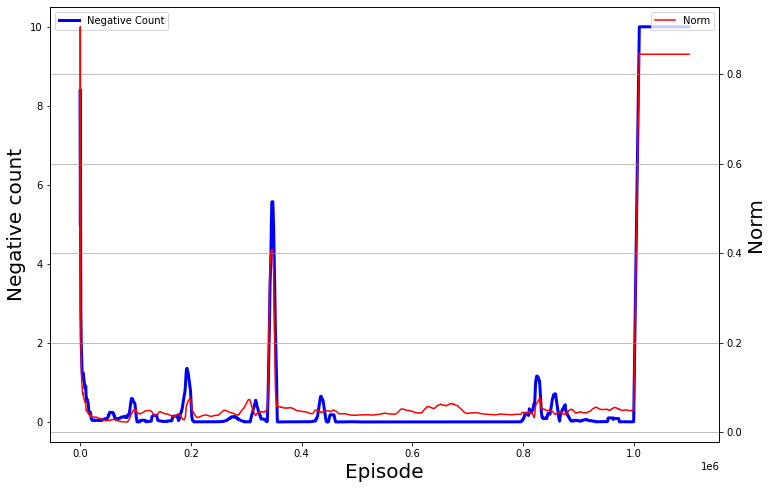

In [ ]:
#plt.plot(new_neg_cnt)
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(new_neg_cnt_moving_avg, 'b', linewidth = 3, label = 'Negative Count')
ax2.plot(new_norms_moving_avg, 'r', label = 'Norm')

ax1.set_xlabel('Episode', fontsize = 20)
ax1.set_ylabel('Negative count', fontsize = 20)
ax2.set_ylabel('Norm', fontsize = 20)

ax1.legend()
ax2.legend()

plt.grid(True)

plt.show()

In [ ]:
all_positive_datas = record.loc[record['neg_cnt'] == 0]
all_positive_datas

,"C[0, 1]","C[0, 2]","C[0, 3]","C[0, 4]","C[0, 5]","C[2, 2]","C[2, 3]","C[2, 4]","C[2, 5]","C[4, 3]","C[4, 4]","C[4, 5]","C[6, 4]","C[6, 5]","C[8, 5]",norm,reward,neg_cnt
536,1.0,0.066221,0.882871,0.018193,0.736233,0.702875,0.282942,0.314768,0.765891,0.011917,0.844547,0.894114,0.024331,0.072309,0.006468,0.040223,1.2,0
559,1.0,0.527789,0.723531,0.089315,0.113008,0.972518,0.470031,0.196813,0.880358,0.428580,0.151109,0.690419,0.019434,0.102924,0.010182,0.056303,1.2,0
567,1.0,0.409976,0.830532,0.011353,0.620930,0.825960,0.755181,0.452833,0.800831,0.376062,0.565524,0.227987,0.019990,0.100305,0.014469,0.041239,1.2,0
585,1.0,0.234640,0.913404,0.167940,0.573333,0.942843,0.804394,0.119580,0.898017,0.320303,0.941833,0.868272,0.027605,0.030980,0.022390,0.045843,-0.5,0
594,1.0,0.698714,0.958811,0.046956,0.544982,0.760236,0.512496,0.361647,0.964838,0.575786,0.951644,0.804872,0.012933,0.044394,0.006894,0.046939,1.2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,1.0,0.326843,0.384329,0.244681,0.578965,0.713166,0.895218,0.907713,0.036087,0.339592,0.461496,0.207441,0.012736,0.040258,0.005640,0.049823,-0.5,0
999996,1.0,0.682595,0.464811,0.384078,0.099118,0.791670,0.748386,0.807308,0.800280,0.333264,0.277911,0.570530,0.017851,0.025169,0.003105,0.059370,-0.5,0
999997,1.0,0.032212,0.434907,0.602056,0.129476,0.734530,0.996037,0.929311,0.314459,0.362574,0.454878,0.095035,0.013141,0.021318,0.007116,0.052652,1.2,0
999998,1.0,0.790125,0.398377,0.605465,0.117710,0.671545,0.892372,0.536833,0.149064,0.353679,0.013060,0.335046,0.040932,0.018165,0.004029,0.039545,1.2,0


In [ ]:
positive_data_norm = all_positive_datas['norm']
better_than_string_data = all_positive_datas.loc[all_positive_datas['norm'] <= string_norm]
better_than_string_data

,"C[0, 1]","C[0, 2]","C[0, 3]","C[0, 4]","C[0, 5]","C[2, 2]","C[2, 3]","C[2, 4]","C[2, 5]","C[4, 3]","C[4, 4]","C[4, 5]","C[6, 4]","C[6, 5]","C[8, 5]",norm,reward,neg_cnt
52429,1.0,0.401320,0.846899,0.541747,0.811439,0.200646,0.161445,0.463935,0.494476,0.063166,0.009324,0.270854,0.010363,0.025470,0.004954,0.007532,11.2,0
89778,1.0,0.422390,0.045290,0.396190,0.620671,0.269283,0.917346,0.454045,0.840692,0.031537,0.478952,0.539864,0.016005,0.036688,0.009811,0.009502,1.2,0
90062,1.0,0.826466,0.713571,0.297386,0.897652,0.251899,0.916540,0.207463,0.293186,0.020609,0.650956,0.441242,0.012899,0.026569,0.009755,0.009320,1.2,0


In [ ]:
spec_1 = (better_than_string_data.values[0, :-3])
#spec_1 = spec_1 / spec_1[5] * 1/6
spec_1 = list(spec_1)
spec_1_S_matrix = S_Matrix_env.S_Matrix.Spectrum_Gen(
    s_spin_num = spin_num_no_scalar, s_mass_spec = mass_spec_no_scalar, s_cl_spec = spec_1,
    t_spin_num = spin_num_no_scalar, t_mass_spec = mass_spec_no_scalar, t_cl_spec = spec_1,
    interested_constraint = constrained_k,
    u_channel = True
    )
spec_1_norm = -spec_1_S_matrix.Reward()

spec_2 = (better_than_string_data.values[1, :-3])
#spec_2 = spec_2 / spec_2[5] * 1/6
spec_2 = list(spec_2)
spec_2_S_matrix = S_Matrix_env.S_Matrix.Spectrum_Gen(
    s_spin_num = spin_num_no_scalar, s_mass_spec = mass_spec_no_scalar, s_cl_spec = spec_2,
    t_spin_num = spin_num_no_scalar, t_mass_spec = mass_spec_no_scalar, t_cl_spec = spec_2,
    interested_constraint = constrained_k,
    u_channel = True
    )
spec_2_norm = -spec_2_S_matrix.Reward()

spec_3 = (better_than_string_data.values[2, :-3])
#spec_3 = spec_3 / spec_3[5] * 1/6
spec_3 = list(spec_3)
spec_3_S_matrix = S_Matrix_env.S_Matrix.Spectrum_Gen(
    s_spin_num = spin_num_no_scalar, s_mass_spec = mass_spec_no_scalar, s_cl_spec = spec_3,
    t_spin_num = spin_num_no_scalar, t_mass_spec = mass_spec_no_scalar, t_cl_spec = spec_3,
    interested_constraint = constrained_k,
    u_channel = True
    )
spec_3_norm = -spec_3_S_matrix.Reward()

In [ ]:
min_norm_in_good_spec = min(better_than_string_data['norm'])
best_spec = better_than_string_data.loc[better_than_string_data['norm'] == min_norm_in_good_spec]
best_spec = list(best_spec.values[0][:-3])

In [ ]:
frames = [String.data_frame_form(), spec_1_S_matrix.data_frame_form(), spec_2_S_matrix.data_frame_form(), spec_3_S_matrix.data_frame_form()]
key_list = [
    f'String, norm = {string_norm:.2e}',
    f'Spec_1, norm = {spec_1_norm:.2e}',
    f'Spec_2, norm = {spec_2_norm:.2e}',
    f'Spec_3, norm = {spec_3_norm:.2e}',
]
pd.concat(frames, keys = key_list)

m^2 = 1   m^2 = 2   m^2 = 3   m^2 = 4   m^2 = 5
String, norm = 9.52e-03 0      1.0  0.083333  0.019444  0.007077  0.003280
                        2      NaN  0.166667  0.059524  0.025794  0.013065
                        4      NaN       NaN  0.032143  0.021934  0.013719
                        6      NaN       NaN       NaN  0.007696  0.007829
                        8      NaN       NaN       NaN       NaN  0.002108
Spec_1, norm = 6.75e-03 2      NaN  0.166667  0.617566  0.084716  0.976459
                        4      NaN       NaN  0.004958  0.422190  0.449876
                        6      NaN       NaN       NaN  0.009086  0.037083
                        8      NaN       NaN       NaN       NaN  0.004175
Spec_2, norm = 9.39e-03 2      NaN  0.166667  0.767771  0.733963  0.184362
                        4      NaN       NaN  0.018649  0.491042  0.385620
                        6      NaN       NaN       NaN  0.009191  0.023988
                        8      NaN       NaN       NaN       NaN  0.003001
Spec_3, norm = 8.61e-03 2      NaN  0.166667  0.924351  0.494086  0.640349
                        4      NaN       NaN  0.023563  0.413843  0.387379
                        6      NaN       NaN       NaN  0.013632  0.027408
                        8      NaN       NaN       NaN       NaN  0.002982

In [ ]:
better_than_string_datas = record.loc[record['norm'] < string_norm]

In [ ]:
better_than_string_datas['neg_cnt'].values.mean()
better_than_string_datas['neg_cnt'].values.std()

1.5659409715637587

## Record Data (9M step training)

In [63]:
cl_names = [f'C[{l}, {n}]' for l in range(2, 9, 2) for n in range(l//2 + 1, 6)]
col_names = cl_names + ['norm'] + ['reward'] + ['neg_cnt']
record = pd.read_csv('record_9_million_data.csv', header = None, names = col_names)
#record.style.set_caption(f'All data of {len(record)} steps')

In [152]:
sqrt(2 * 3**2)

4.242640687119285

In [65]:
new_neg_cnt = record['neg_cnt'].values
new_neg_cnt_moving_avg = moving_avg(new_neg_cnt)
new_neg_cnt_moving_std = moving_std(new_neg_cnt)
new_norms = record['norm'].values
new_norms_moving_avg = moving_avg(new_norms)
new_norms_moving_std = moving_std(new_norms)

In [97]:
print({i: list(new_neg_cnt).count(i) for i in range(max(new_neg_cnt + 1))})

{0: 6383, 1: 955100, 2: 79439, 3: 82764, 4: 375693, 5: 247375, 6: 1098858, 7: 2490, 8: 1277264, 9: 992782, 10: 1562202, 11: 2319650}


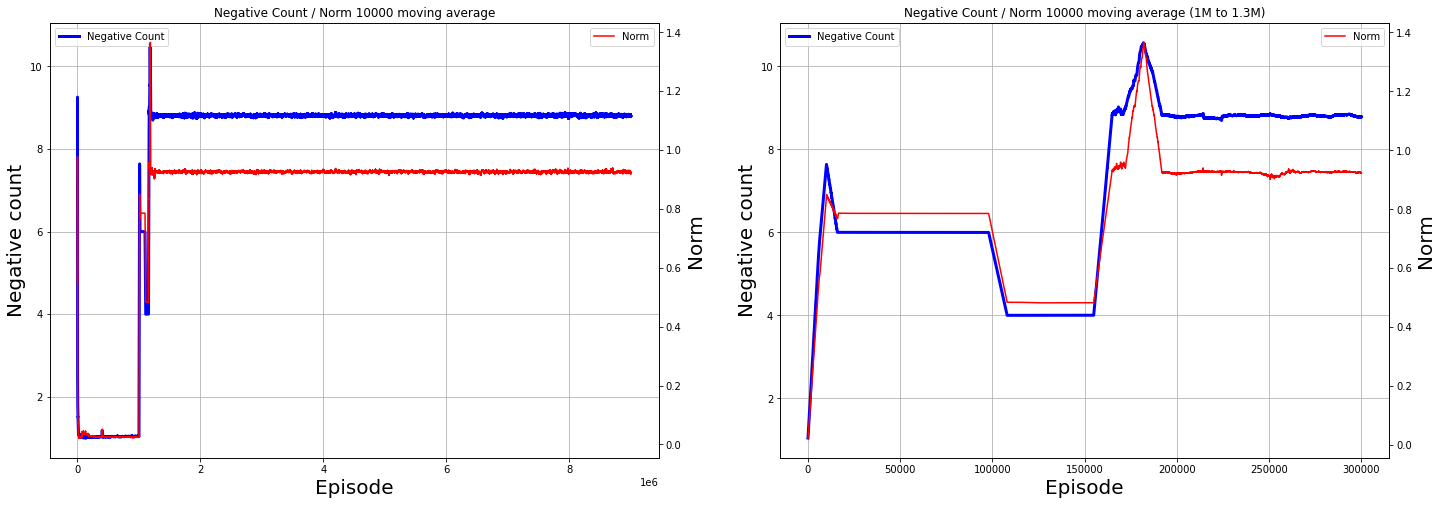

In [112]:
fig, (ax1, ax3) = plt.subplots(1, 2)

ax2 = ax1.twinx()
ax1.plot(new_neg_cnt_moving_avg, 'b', linewidth = 3, label = 'Negative Count')
ax2.plot(new_norms_moving_avg, 'r', label = 'Norm')

ax1.set_xlabel('Episode', fontsize = 20)
ax1.set_ylabel('Negative count', fontsize = 20)
ax2.set_ylabel('Norm', fontsize = 20)
ax1.legend(loc = 'upper left')
ax2.legend(loc = 'upper right')
ax1.set_title('Negative Count / Norm 10000 moving average')

ax1.grid(True)


ax4 = ax3.twinx()
ax3.plot(new_neg_cnt_moving_avg[1000000: 1300000], 'b', linewidth = 3, label = 'Negative Count')
ax4.plot(new_norms_moving_avg[1000000: 1300000], 'r', label = 'Norm')

ax3.set_xlabel('Episode', fontsize = 20)
ax3.set_ylabel('Negative count', fontsize = 20)
ax4.set_ylabel('Norm', fontsize = 20)
ax3.legend(loc = 'upper left')
ax4.legend(loc = 'upper right')
ax3.set_title('Negative Count / Norm 10000 moving average (1M to 1.3M)')

ax3.grid(True)


fig.set_figheight(8)
fig.set_figwidth(24)

plt.show()

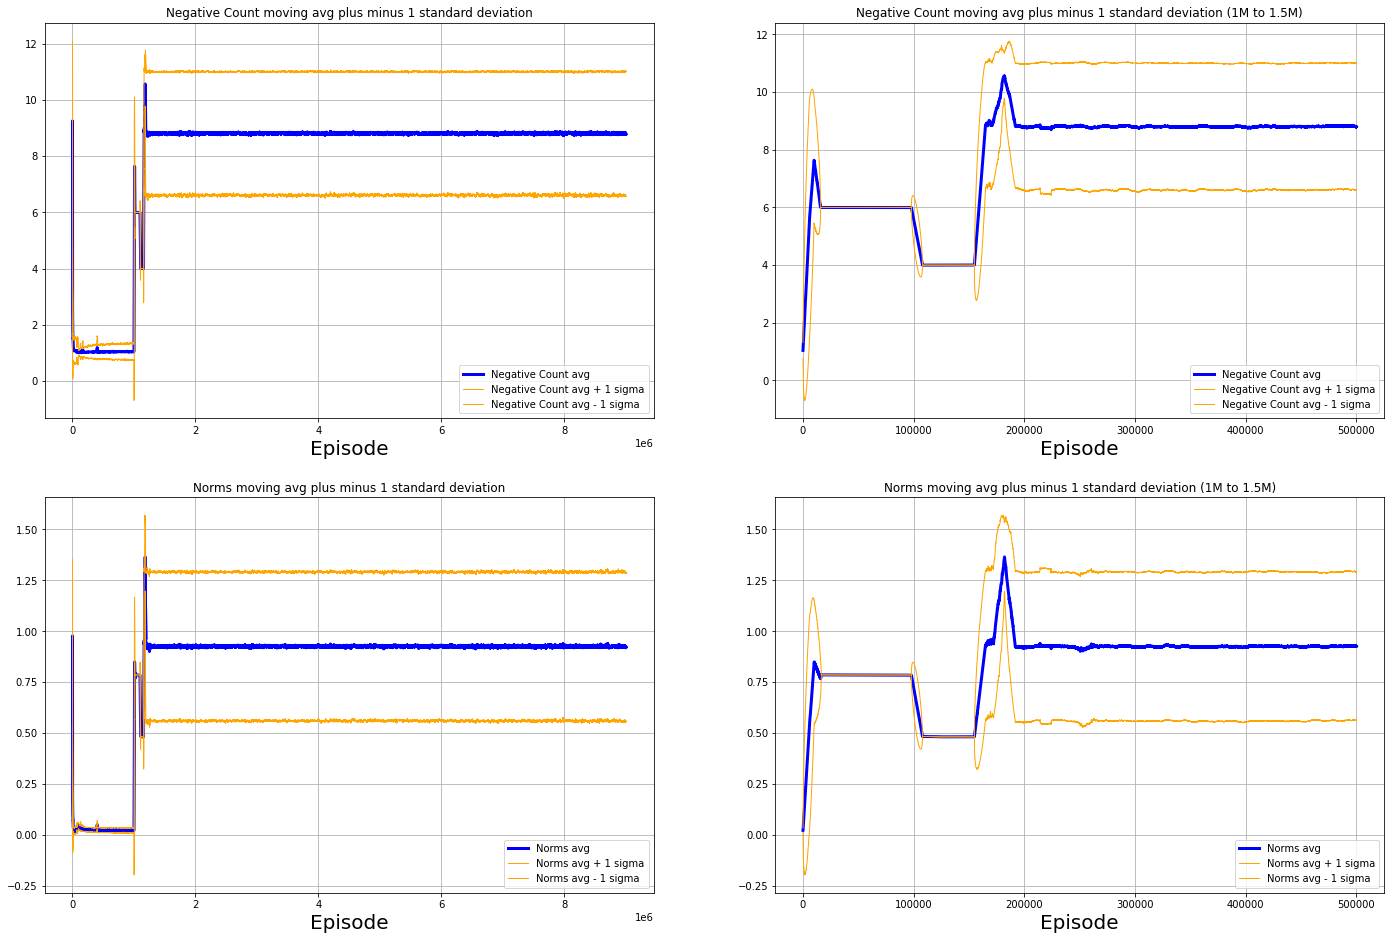

In [128]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)

#ax2 = ax1.twinx()
ax1.plot(new_neg_cnt_moving_avg, 'b', linewidth = 3, label = 'Negative Count avg')
ax1.plot(array(new_neg_cnt_moving_avg) + array(new_neg_cnt_moving_std), 'orange', linewidth = 1, label = 'Negative Count avg + 1 sigma')
ax1.plot(array(new_neg_cnt_moving_avg) - array(new_neg_cnt_moving_std), 'orange', linewidth = 1, label = 'Negative Count avg - 1 sigma')
ax1.set_xlabel('Episode', fontsize = 20)
ax1.legend(loc = 'lower right')
ax1.set_title('Negative Count moving avg plus minus 1 standard deviation')
ax1.grid(True)

ax2.plot(new_neg_cnt_moving_avg[1000000: 1500000], 'b', linewidth = 3, label = 'Negative Count avg')
ax2.plot(array(new_neg_cnt_moving_avg[1000000: 1500000]) + array(new_neg_cnt_moving_std[1000000: 1500000]), 'orange', linewidth = 1, label = 'Negative Count avg + 1 sigma')
ax2.plot(array(new_neg_cnt_moving_avg[1000000: 1500000]) - array(new_neg_cnt_moving_std[1000000: 1500000]), 'orange', linewidth = 1, label = 'Negative Count avg - 1 sigma')
ax2.set_xlabel('Episode', fontsize = 20)
ax2.legend(loc = 'lower right')
ax2.set_title('Negative Count moving avg plus minus 1 standard deviation (1M to 1.5M)')
ax2.grid(True)


ax3.plot(new_norms_moving_avg, 'b', linewidth = 3, label = 'Norms avg')
ax3.plot(array(new_norms_moving_avg) + array(new_norms_moving_std), 'orange', linewidth = 1, label = 'Norms avg + 1 sigma')
ax3.plot(array(new_norms_moving_avg) - array(new_norms_moving_std), 'orange', linewidth = 1, label = 'Norms avg - 1 sigma')
ax3.set_xlabel('Episode', fontsize = 20)
ax3.legend(loc = 'lower right')
ax3.set_title('Norms moving avg plus minus 1 standard deviation')
ax3.grid(True)

ax4.plot(new_norms_moving_avg[1000000: 1500000], 'b', linewidth = 3, label = 'Norms avg')
ax4.plot(array(new_norms_moving_avg[1000000: 1500000]) + array(new_norms_moving_std[1000000: 1500000]), 'orange', linewidth = 1, label = 'Norms avg + 1 sigma')
ax4.plot(array(new_norms_moving_avg[1000000: 1500000]) - array(new_norms_moving_std[1000000: 1500000]), 'orange', linewidth = 1, label = 'Norms avg - 1 sigma')
ax4.set_xlabel('Episode', fontsize = 20)
ax4.legend(loc = 'lower right')
ax4.set_title('Norms moving avg plus minus 1 standard deviation (1M to 1.5M)')
ax4.grid(True)
#plt.grid(True)
fig.set_figheight(16)
fig.set_figwidth(24)

plt.show()

In [122]:
all_positive_datas = record.loc[record['neg_cnt'] == 0]
positive_data_norm = all_positive_datas['norm']
better_than_string_data = all_positive_datas.loc[all_positive_datas['norm'] <= string_norm]
better_than_string_data = better_than_string_data.sort_values('norm')
better_than_string_data.drop(['norm', 'reward', 'neg_cnt'], axis = 1).to_csv('Better_than_string_Cl_from_9M_training.csv')

In [126]:
record[['norm', 'reward', 'neg_cnt']].to_csv('Norm_Reward_Neg_from_9M_traing.csv')

In [19]:
spec_1 = (better_than_string_data.values[0, :-3])
spec_1 = list(spec_1)
spec_1_S_matrix = S_Matrix_env.S_Matrix.Spectrum_Gen(
    s_spin_num = spin_num_no_scalar, s_mass_spec = mass_spec_no_scalar, s_cl_spec = spec_1,
    t_spin_num = spin_num_no_scalar, t_mass_spec = mass_spec_no_scalar, t_cl_spec = spec_1,
    interested_constraint = constrained_k,
    u_channel = True
    )
spec_1_norm = -spec_1_S_matrix.Reward()

spec_2 = (better_than_string_data.values[1, :-3])
spec_2 = list(spec_2)
spec_2_S_matrix = S_Matrix_env.S_Matrix.Spectrum_Gen(
    s_spin_num = spin_num_no_scalar, s_mass_spec = mass_spec_no_scalar, s_cl_spec = spec_2,
    t_spin_num = spin_num_no_scalar, t_mass_spec = mass_spec_no_scalar, t_cl_spec = spec_2,
    interested_constraint = constrained_k,
    u_channel = True
    )
spec_2_norm = -spec_2_S_matrix.Reward()

spec_3 = (better_than_string_data.values[2, :-3])
spec_3 = list(spec_3)
spec_3_S_matrix = S_Matrix_env.S_Matrix.Spectrum_Gen(
    s_spin_num = spin_num_no_scalar, s_mass_spec = mass_spec_no_scalar, s_cl_spec = spec_3,
    t_spin_num = spin_num_no_scalar, t_mass_spec = mass_spec_no_scalar, t_cl_spec = spec_3,
    interested_constraint = constrained_k,
    u_channel = True
    )
spec_3_norm = -spec_3_S_matrix.Reward()

In [21]:
frames = [String.data_frame_form().drop(0), spec_1_S_matrix.data_frame_form(), spec_2_S_matrix.data_frame_form(), spec_3_S_matrix.data_frame_form()]
key_list = [
    f'String, norm = {string_norm:.2e}',
    f'Spec_1, norm = {spec_1_norm:.2e}',
    f'Spec_2, norm = {spec_2_norm:.2e}',
    f'Spec_3, norm = {spec_3_norm:.2e}',
]
pd.concat(frames, keys = key_list)

m^2 = 1   m^2 = 2   m^2 = 3   m^2 = 4   m^2 = 5
String, norm = 9.52e-03 2      NaN  0.166667  0.059524  0.025794  0.013065
                        4      NaN       NaN  0.032143  0.021934  0.013719
                        6      NaN       NaN       NaN  0.007696  0.007829
                        8      NaN       NaN       NaN       NaN  0.002108
Spec_1, norm = 4.36e-03 2      NaN  0.166667  0.777125  0.477733  0.994155
                        4      NaN       NaN  0.054936  0.052967  0.325382
                        6      NaN       NaN       NaN  0.010622  0.012751
                        8      NaN       NaN       NaN       NaN  0.010652
Spec_2, norm = 4.60e-03 2      NaN  0.166667  0.140048  0.359346  0.143889
                        4      NaN       NaN  0.047867  0.005116  0.208876
                        6      NaN       NaN       NaN  0.008416  0.013727
                        8      NaN       NaN       NaN       NaN  0.007042
Spec_3, norm = 4.79e-03 2      NaN  0.166667  0.416301  0.693991  0.768145
                        4      NaN       NaN  0.039008  0.120597  0.154809
                        6      NaN       NaN       NaN  0.011180  0.019652
                        8      NaN       NaN       NaN       NaN  0.007324

## Near String Behavior

In [9]:
cl_names = [f'C[{l}, {n}]' for l in range(2, 9, 2) for n in range(l//2 + 1, 6)]
col_names = cl_names + ['norm'] + ['reward'] + ['neg_cnt']
record_near_string = pd.read_csv('record_string_distance.csv', header = None, names = col_names)

In [10]:
record_near_string

,"C[2, 2]","C[2, 3]","C[2, 4]","C[2, 5]","C[4, 3]","C[4, 4]","C[4, 5]","C[6, 4]","C[6, 5]","C[8, 5]",norm,reward,neg_cnt
0,0.166667,0.238828,0.387467,0.945337,0.274862,0.163068,0.394784,0.498746,0.783101,0.277567,0.698849,-1000.0,8
1,0.166667,0.271433,0.305124,0.151711,0.199712,0.672252,0.902565,0.191424,0.834459,0.531026,0.824475,-1000.0,11
2,0.166667,0.654795,0.839699,0.981214,0.623662,0.974166,0.396994,0.296613,0.831208,0.223462,0.557157,-1000.0,6
3,0.166667,0.280372,0.077153,0.059969,0.584125,0.167850,0.204994,0.335030,0.198045,0.365650,0.641436,-4.8,8
4,0.166667,0.658765,0.545717,0.861471,0.270854,0.853162,0.758101,0.442957,0.683557,0.023084,0.376278,-1000.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999995,0.166667,0.208781,0.313039,0.214415,0.273769,0.165839,0.149391,0.239275,0.083622,0.135715,0.295388,-14.8,8
1999996,0.166667,0.156255,0.188782,0.277483,0.240663,0.123988,0.171796,0.168365,0.123275,0.156889,0.283700,-14.8,8
1999997,0.166667,0.280844,0.363949,0.090723,0.217109,0.143841,0.211540,0.296361,0.140464,0.238161,0.446636,-16.5,8
1999998,0.166667,0.125475,0.193267,0.227176,0.167962,0.202739,0.431291,0.369709,0.277328,0.254165,0.524790,-16.5,8


In [11]:
near_str_neg_cnt = record_near_string['neg_cnt'].values
near_str_neg_cnt_moving_avg = moving_avg(near_str_neg_cnt)
near_str_norms = record_near_string['norm'].values
near_str_norms_moving_avg = moving_avg(near_str_norms)

In [14]:
print({i: list(near_str_neg_cnt).count(i) for i in range(max(near_str_neg_cnt))})

{0: 5562, 1: 10, 2: 135, 3: 703, 4: 7541, 5: 21877, 6: 235505, 7: 48, 8: 1366743, 9: 212903, 10: 87937}


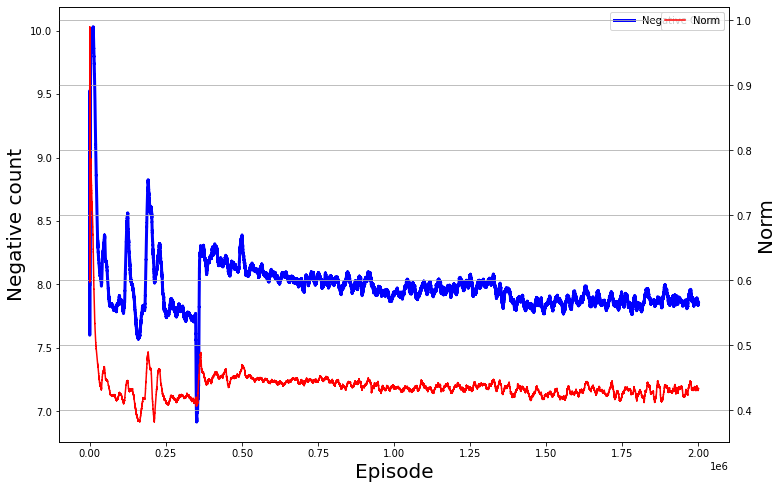

In [15]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(near_str_neg_cnt_moving_avg, 'b', linewidth = 3, label = 'Negative Count')
ax2.plot(near_str_norms_moving_avg, 'r', label = 'Norm')

ax1.set_xlabel('Episode', fontsize = 20)
ax1.set_ylabel('Negative count', fontsize = 20)
ax2.set_ylabel('Norm', fontsize = 20)

ax1.legend()
ax2.legend()

plt.grid(True)

plt.show()

In [17]:
all_positive_datas_near_string = record_near_string.loc[record_near_string['neg_cnt'] == 0]
all_positive_datas_near_string

,"C[2, 2]","C[2, 3]","C[2, 4]","C[2, 5]","C[4, 3]","C[4, 4]","C[4, 5]","C[6, 4]","C[6, 5]","C[8, 5]",norm,reward,neg_cnt
200203,0.166667,0.059524,0.025794,0.013065,0.032143,0.021934,0.013719,0.007696,0.007829,0.002108,0.009521,11.2,0
200747,0.166667,0.059524,0.025794,0.013062,0.032143,0.021934,0.013719,0.007696,0.007829,0.002108,0.009521,11.2,0
200758,0.166667,0.059524,0.025794,0.013065,0.032143,0.021934,0.013719,0.007696,0.007829,0.002108,0.009521,1.2,0
200832,0.166667,0.059524,0.025794,0.013065,0.032143,0.021934,0.013719,0.007696,0.007829,0.002108,0.009521,1.2,0
201043,0.166667,0.059524,0.025794,0.013065,0.032143,0.021934,0.013719,0.007696,0.007829,0.002108,0.009521,1.2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999241,0.166667,0.059524,0.025794,0.013065,0.032143,0.021934,0.013719,0.007696,0.007829,0.002108,0.009521,1.2,0
1999505,0.166667,0.059524,0.025794,0.013065,0.032143,0.021934,0.013719,0.007696,0.007829,0.002108,0.009521,1.2,0
1999524,0.166667,0.059524,0.025794,0.013065,0.032143,0.021934,0.013719,0.007696,0.007829,0.002108,0.009521,1.2,0
1999541,0.166667,0.059524,0.025794,0.013065,0.032143,0.021934,0.013719,0.007696,0.007829,0.002108,0.009521,1.2,0


In [20]:
positive_data_norm_near_string = all_positive_datas_near_string['norm']
better_than_string_data_near_string = all_positive_datas_near_string.loc[all_positive_datas_near_string['norm'] <= string_norm]
better_than_string_data_near_string = better_than_string_data_near_string.sort_values('norm')
better_than_string_data_near_string

,"C[2, 2]","C[2, 3]","C[2, 4]","C[2, 5]","C[4, 3]","C[4, 4]","C[4, 5]","C[6, 4]","C[6, 5]","C[8, 5]",norm,reward,neg_cnt
200747,0.166667,0.059524,0.025794,0.013062,0.032143,0.021934,0.013719,0.007696,0.007829,0.002108,0.009521,11.2,0
200203,0.166667,0.059524,0.025794,0.013065,0.032143,0.021934,0.013719,0.007696,0.007829,0.002108,0.009521,11.2,0
1243320,0.166667,0.059524,0.025794,0.013065,0.032143,0.021934,0.013719,0.007696,0.007829,0.002108,0.009521,1.2,0
1243145,0.166667,0.059524,0.025794,0.013065,0.032143,0.021934,0.013719,0.007696,0.007829,0.002108,0.009521,1.2,0
1243022,0.166667,0.059524,0.025794,0.013065,0.032143,0.021934,0.013719,0.007696,0.007829,0.002108,0.009521,1.2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
440494,0.166667,0.059524,0.025794,0.013065,0.032143,0.021934,0.013719,0.007696,0.007829,0.002108,0.009521,1.2,0
439367,0.166667,0.059524,0.025794,0.013065,0.032143,0.021934,0.013719,0.007696,0.007829,0.002108,0.009521,1.2,0
439264,0.166667,0.059524,0.025794,0.013065,0.032143,0.021934,0.013719,0.007696,0.007829,0.002108,0.009521,1.2,0
442401,0.166667,0.059524,0.025794,0.013065,0.032143,0.021934,0.013719,0.007696,0.007829,0.002108,0.009521,1.2,0


In [45]:
string_flat = String.data_frame_form().drop(0).to_numpy().flatten()
string_flat = string_flat[~np.isnan(string_flat)]
near_string_best = all_positive_datas_near_string.to_numpy()[0][:-3]
compare = stack((string_flat, near_string_best))
compare_df = pd.DataFrame(compare, columns = col_names[:-3])

In [46]:
compare_df

,"C[2, 2]","C[2, 3]","C[2, 4]","C[2, 5]","C[4, 3]","C[4, 4]","C[4, 5]","C[6, 4]","C[6, 5]","C[8, 5]"
0,0.166667,0.059524,0.025794,0.013065,0.032143,0.021934,0.013719,0.007696,0.007829,0.002108
1,0.166667,0.059524,0.025794,0.013065,0.032143,0.021934,0.013719,0.007696,0.007829,0.002108


In [34]:
String.data_frame_form()

,m^2 = 1,m^2 = 2,m^2 = 3,m^2 = 4,m^2 = 5
0,1.0,0.083333,0.019444,0.007077,0.003280
2,NaN,0.166667,0.059524,0.025794,0.013065
4,NaN,NaN,0.032143,0.021934,0.013719
6,NaN,NaN,NaN,0.007696,0.007829
8,NaN,NaN,NaN,NaN,0.002108


In [50]:
xxx = np.array([0.166667, 0.059524, 0.025794, 0.013065, 0.032143, 0.021934, 0.013719, 0.007696, 0.007829, 0.002108])
yyy = np.array([0.16666667, 0.05952381, 0.02579365, 0.01306467, 0.03214286, 0.02193362, 0.01371892, 0.00769601, 0.00782878, 0.00210775])
xxx - yyy

array([ 3.3e-07,  1.9e-07,  3.5e-07,  3.3e-07,  1.4e-07,  3.8e-07,
        8.0e-08, -1.0e-08,  2.2e-07,  2.5e-07])

In [49]:
all_positive_datas_near_string

,"C[2, 2]","C[2, 3]","C[2, 4]","C[2, 5]","C[4, 3]","C[4, 4]","C[4, 5]","C[6, 4]","C[6, 5]","C[8, 5]",norm,reward,neg_cnt
200203,0.166667,0.059524,0.025794,0.013065,0.032143,0.021934,0.013719,0.007696,0.007829,0.002108,0.009521,11.2,0
200747,0.166667,0.059524,0.025794,0.013062,0.032143,0.021934,0.013719,0.007696,0.007829,0.002108,0.009521,11.2,0
200758,0.166667,0.059524,0.025794,0.013065,0.032143,0.021934,0.013719,0.007696,0.007829,0.002108,0.009521,1.2,0
200832,0.166667,0.059524,0.025794,0.013065,0.032143,0.021934,0.013719,0.007696,0.007829,0.002108,0.009521,1.2,0
201043,0.166667,0.059524,0.025794,0.013065,0.032143,0.021934,0.013719,0.007696,0.007829,0.002108,0.009521,1.2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999241,0.166667,0.059524,0.025794,0.013065,0.032143,0.021934,0.013719,0.007696,0.007829,0.002108,0.009521,1.2,0
1999505,0.166667,0.059524,0.025794,0.013065,0.032143,0.021934,0.013719,0.007696,0.007829,0.002108,0.009521,1.2,0
1999524,0.166667,0.059524,0.025794,0.013065,0.032143,0.021934,0.013719,0.007696,0.007829,0.002108,0.009521,1.2,0
1999541,0.166667,0.059524,0.025794,0.013065,0.032143,0.021934,0.013719,0.007696,0.007829,0.002108,0.009521,1.2,0


## Weird Oscillating Behavior

In [4]:
cl_names = [f'C[{l}, {n}]' for l in range(2, 9, 2) for n in range(l//2 + 1, 6)]
col_names_osc = cl_names + ['norm'] + ['reward'] + ['neg_cnt'] + ['big_value_punish']
record_osc = pd.read_csv('record-big_value_punishment.csv', header = None, names = col_names_osc)

In [19]:
osc_cnt = record_osc['big_value_punish'].values
osc_neg_cnt = record_osc['neg_cnt'].values
osc_neg_cnt_moving_avg = moving_avg(osc_neg_cnt)
osc_norms = record_osc['norm'].values
osc_norms_moving_avg = moving_avg(osc_norms)

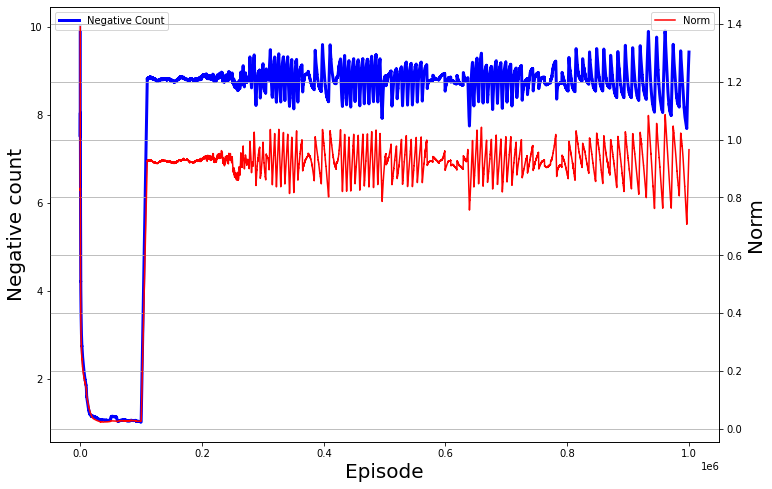

In [24]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(osc_neg_cnt_moving_avg, 'b', linewidth = 3, label = 'Negative Count')
ax2.plot(osc_norms_moving_avg, 'r', label = 'Norm')

ax1.set_xlabel('Episode', fontsize = 20)
ax1.set_ylabel('Negative count', fontsize = 20)
ax2.set_ylabel('Norm', fontsize = 20)

ax1.legend(loc = 'upper left')
ax2.legend(loc = 'upper right')

plt.grid(True)

plt.show()

In [61]:
osc_neg_cnt_moving_std = moving_std(osc_neg_cnt)
osc_norms_moving_std = moving_std(osc_norms)

In [ ]:
fig, ax1 = plt.subplots()

#ax2 = ax1.twinx()
ax1.plot(osc_neg_cnt_moving_avg, 'b', linewidth = 3, label = 'Negative Count avg')
ax1.plot(array(osc_neg_cnt_moving_avg) + array(osc_neg_cnt_moving_std), 'orange', linewidth = 1, label = 'Negative Count avg + 1 sigma')
ax1.plot(array(osc_neg_cnt_moving_avg) - array(osc_neg_cnt_moving_std), 'orange', linewidth = 1, label = 'Negative Count avg - 1 sigma')

ax1.set_xlabel('Episode', fontsize = 20)
ax1.legend(loc = 'lower right')
ax1.set_title('Negative Count moving avg plus minus 1 standard deviation')

plt.grid(True)

plt.show()

In [133]:
all_positive_datas_osc = record_osc.loc[record_osc['neg_cnt'] == 0]
positive_data_norm_osc = all_positive_datas_osc['norm']
better_than_string_data_osc = all_positive_datas_osc.loc[all_positive_datas_osc['norm'] <= string_norm]
better_than_string_data_osc = better_than_string_data_osc.sort_values('norm')
better_than_string_data_osc.drop(['norm', 'reward', 'neg_cnt', 'big_value_punish'], axis = 1).to_csv('Better_than_string_Cl_from_Oscillating_data.csv')

In [134]:
record_osc[['norm', 'reward', 'neg_cnt', 'big_value_punish']].to_csv('Norm_Reward_Neg_from_Oscillating_data.csv')

## Positive Punishment Off

In [212]:
No_Positive_Punisment_data = Plotter.Plotter(data_path='record_1231231234.csv', cl_name=cl_names, other_col_names = ['norm'] + ['reward'] + ['neg_cnt'] + ['big_value_punish'])

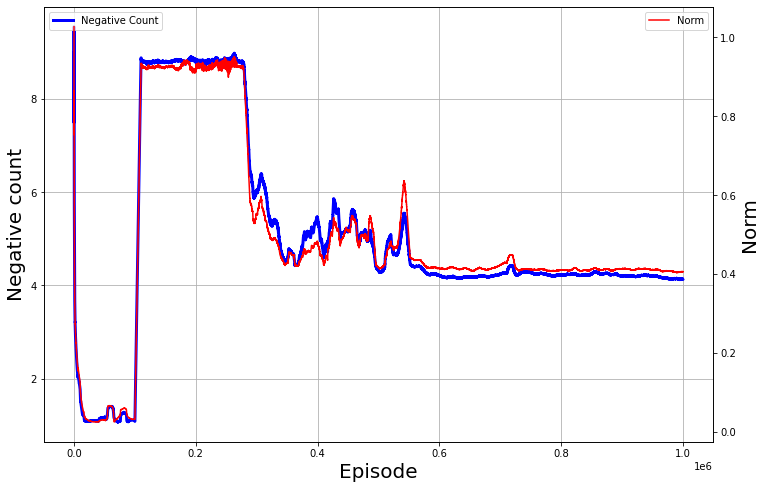

In [213]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(No_Positive_Punisment_data.moving_avg('neg_cnt'), 'b', linewidth = 3, label = 'Negative Count')
ax2.plot(No_Positive_Punisment_data.moving_avg('norm'), 'r', label = 'Norm')

ax1.set_xlabel('Episode', fontsize = 20)
ax1.set_ylabel('Negative count', fontsize = 20)
ax2.set_ylabel('Norm', fontsize = 20)

ax1.legend(loc ='upper left')
ax2.legend(loc ='upper right')

ax1.grid(True)

plt.show()

## Positive Punishment

In [194]:
cl_names = [f'C[{l}, {n}]' for l in range(2, 9, 2) for n in range(l//2 + 1, 6)]
col_names_osc = cl_names + ['norm'] + ['reward'] + ['neg_cnt'] + ['big_value_punish']

In [206]:
new_data = Plotter.Plotter(data_path='record.csv', cl_name=cl_names, other_col_names = ['norm'] + ['reward'] + ['neg_cnt'] + ['big_value_punish'])

In [244]:
new_data.full_record.loc[(new_data.full_record['neg_cnt'] == 0)].loc[new_data.full_record['norm'] <= string_norm].loc[new_data.full_record['big_value_punish'] == 0]

,"C[2, 2]","C[2, 3]","C[2, 4]","C[2, 5]","C[4, 3]","C[4, 4]","C[4, 5]","C[6, 4]","C[6, 5]","C[8, 5]",norm,reward,neg_cnt,big_value_punish
3355,0.166667,0.858005,0.400740,0.609305,0.032419,0.479662,0.402772,0.009874,0.012410,0.004512,0.008928,1.2,0,0
4182,0.166667,0.652375,0.175868,0.823182,0.046400,0.130520,0.393469,0.010357,0.026390,0.005361,0.006564,1.2,0,0
4465,0.166667,0.596527,0.624089,0.693764,0.010269,0.336330,0.463582,0.014142,0.025198,0.002758,0.007428,1.2,0,0
5031,0.166667,0.179006,0.678056,0.376891,0.043840,0.100138,0.404592,0.008970,0.025796,0.002556,0.007308,1.2,0,0
5077,0.166667,0.427501,0.763770,0.082177,0.086191,0.178546,0.050660,0.011159,0.011840,0.004579,0.007417,1.2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199675,0.166667,0.904895,0.206430,0.195763,0.044275,0.345177,0.173060,0.009673,0.013728,0.008378,0.006156,1.2,0,0
199748,0.166667,0.458887,0.821173,0.275905,0.032622,0.071454,0.454566,0.012440,0.020689,0.003336,0.007643,1.2,0,0
199804,0.166667,0.802532,0.054062,0.715548,0.078773,0.177275,0.741271,0.009185,0.018908,0.004255,0.008664,1.2,0,0
199858,0.166667,0.796332,0.691232,0.079349,0.062862,0.228749,0.457532,0.011493,0.018626,0.003132,0.009280,1.2,0,0


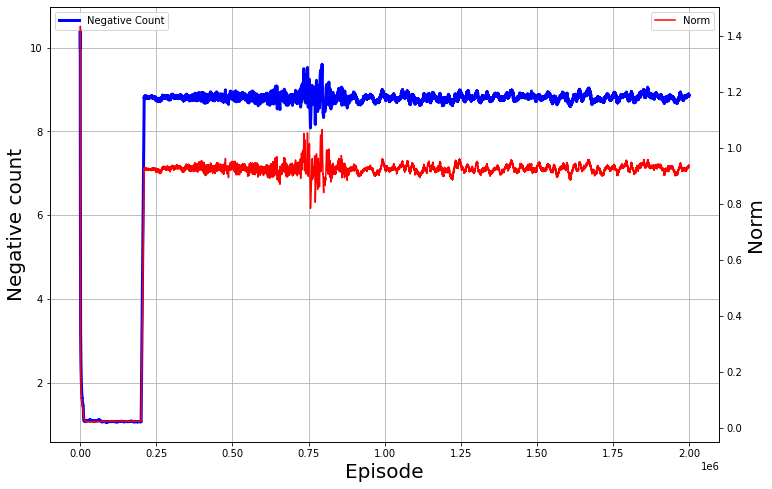

In [208]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(new_data.moving_avg('neg_cnt'), 'b', linewidth = 3, label = 'Negative Count')
ax2.plot(new_data.moving_avg('norm'), 'r', label = 'Norm')

ax1.set_xlabel('Episode', fontsize = 20)
ax1.set_ylabel('Negative count', fontsize = 20)
ax2.set_ylabel('Norm', fontsize = 20)

ax1.legend(loc ='upper left')
ax2.legend(loc ='upper right')

ax1.grid(True)

plt.show()

## Compare

In [226]:
oscillating_data = pd.read_csv('Norm_Reward_Neg_from_Oscillating_data.csv')

In [230]:
osc_neg_cnt_moving_avg = oscillating_data['neg_cnt'].rolling(window = 10000, min_periods = 1).mean().values

In [242]:
osc_reward_moving_avg = oscillating_data['reward'].rolling(window = 10000, min_periods = 1).mean().values

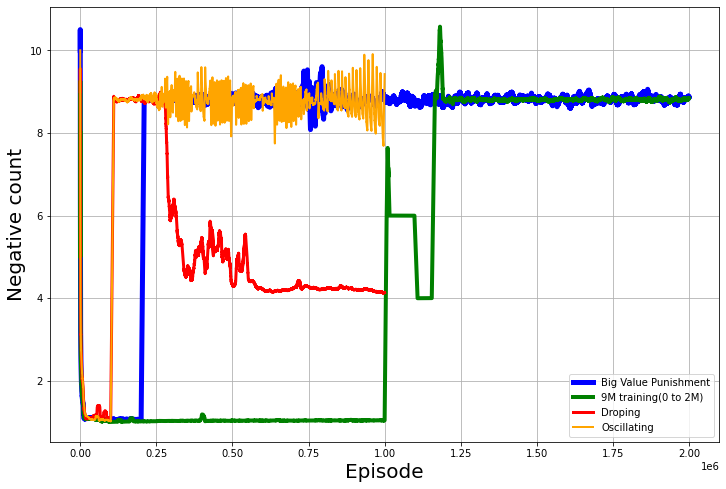

In [237]:
fig, ax1 = plt.subplots()

ax1.plot(new_data.moving_avg('neg_cnt'), 'b', linewidth = 5, label = 'Big Value Punishment')
ax1.plot(new_neg_cnt_moving_avg[:2000000], 'g', linewidth = 4, label = '9M training(0 to 2M)')
ax1.plot(No_Positive_Punisment_data.moving_avg('neg_cnt'), 'red', linewidth = 3, label = 'Droping')
ax1.plot(osc_neg_cnt_moving_avg, 'orange', linewidth = 2, label = 'Oscillating')

ax1.set_xlabel('Episode', fontsize = 20)
ax1.set_ylabel('Negative count', fontsize = 20)

ax1.legend(loc ='lower right')

ax1.grid(True)

plt.show()

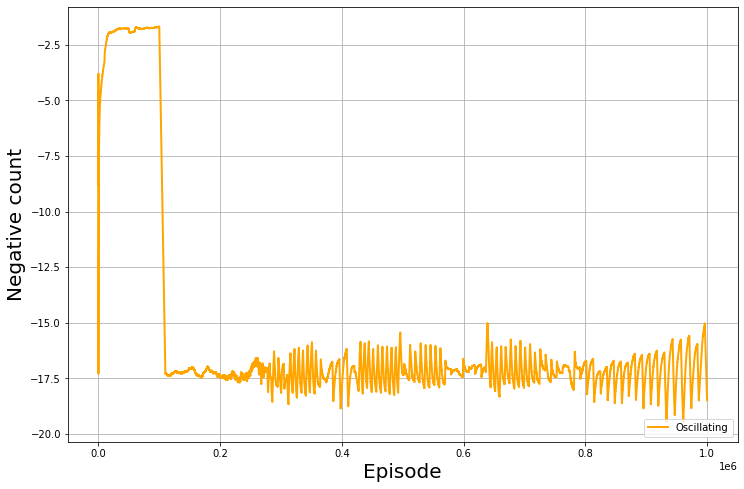

In [243]:
fig, ax1 = plt.subplots()

#ax1.plot(new_data.moving_avg('neg_cnt'), 'b', linewidth = 5, label = 'Big Value Punishment')
#ax1.plot(new_neg_cnt_moving_avg[:2000000], 'g', linewidth = 4, label = '9M training(0 to 2M)')
#ax1.plot(No_Positive_Punisment_data.moving_avg('neg_cnt'), 'red', linewidth = 3, label = 'Droping')
ax1.plot(osc_reward_moving_avg, 'orange', linewidth = 2, label = 'Oscillating')

ax1.set_xlabel('Episode', fontsize = 20)
ax1.set_ylabel('Negative count', fontsize = 20)

ax1.legend(loc ='lower right')

ax1.grid(True)

plt.show()